# <center> Lab 3

### Import libraries

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
NUM_CLUSTERS = 15

### File checking

In [3]:
path = '/Users/valerikanasha228/Downloads/s1.txt'
def check_file_path(path):
    res = True
    if not os.path.exists(path):
        print('ERROR: file not found!')
        res = False
    else:
        if os.path.getsize(path) == 0:
            print('ERROR: file is empty!')
            res = False
    return res

is_file_correct = check_file_path(path)

### Reading a data

In [4]:
if not is_file_correct:
    print("Error: dataset can't be read")
else:
    data = np.loadtxt(path)

### Scalling data

In [5]:
if not is_file_correct:
    print("Error: dataset can't be scalled")
else:
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

## K-Means Clustering

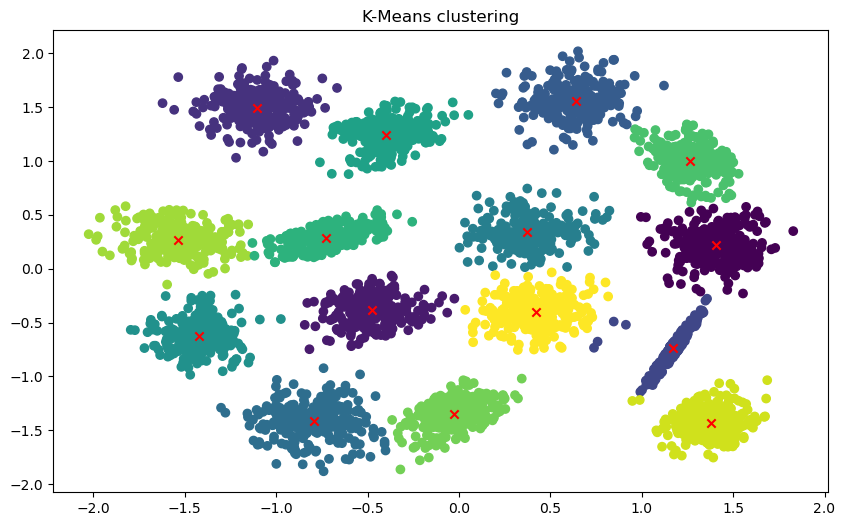

In [6]:
if not is_file_correct:
    print("Error: k-means clustering can't be made")
else:
    kmeans = KMeans(n_clusters=NUM_CLUSTERS, n_init=10)
    kmeans.fit(data)

    kmeans_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
    plt.title('K-Means clustering')
    plt.show()

## AffinityPropagation Clustering

15


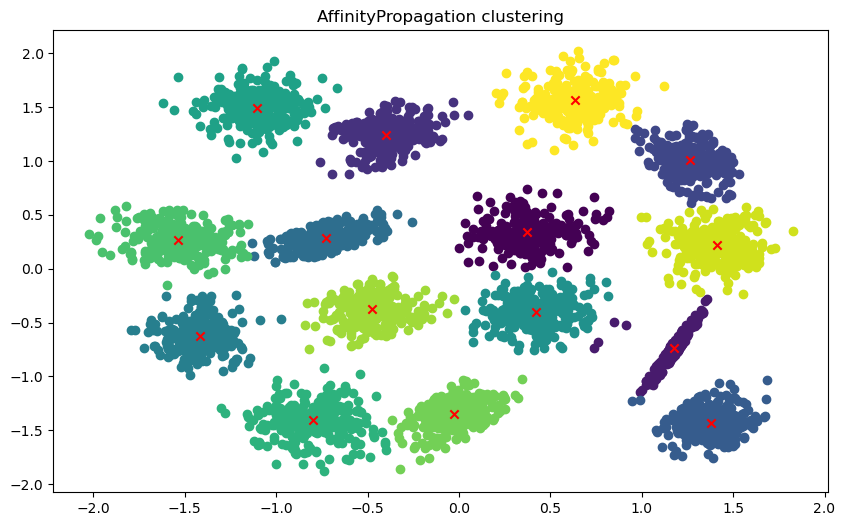

In [7]:
if not is_file_correct:
    print("Error: AF clustering can't be made")
else:    
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-50)
    affinity_propagation.fit(data)
    cluster_labels = affinity_propagation.labels_
    unique_labels = np.unique(cluster_labels)
    colors = plt.get_cmap('viridis', NUM_CLUSTERS)
    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        cluster_data = data[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors(label)])
    cluster_centers_indices = affinity_propagation.cluster_centers_indices_
    centroids = data[cluster_centers_indices]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    plt.title('AffinityPropagation clustering')
    plt.show()

## MeanShift clustering

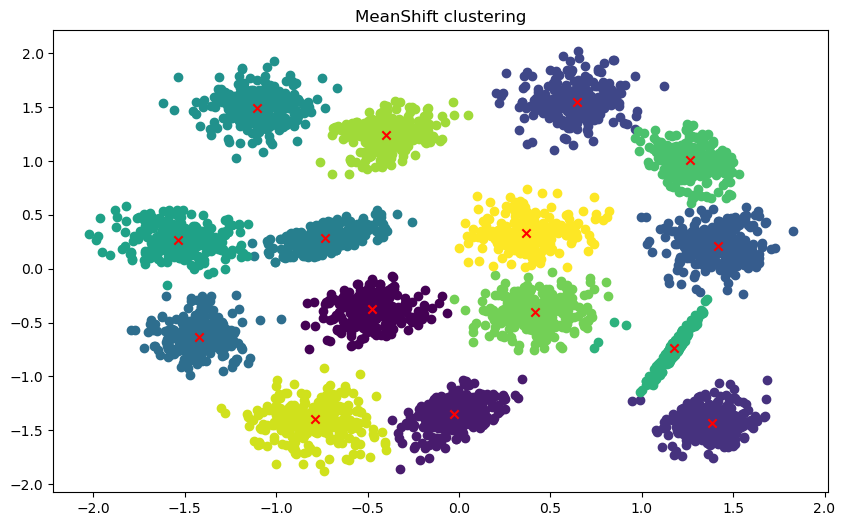

In [8]:
if not is_file_correct:
    print("Error: AF clustering can't be made")
else:     
    bandwidth = estimate_bandwidth(data, quantile=0.05)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(data)
    cluster_labels = mean_shift.labels_
    centroids = mean_shift.cluster_centers_
    unique_labels = np.unique(cluster_labels)
    colors = plt.get_cmap('viridis', NUM_CLUSTERS)
    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        cluster_data = data[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors(label)])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
    plt.title('MeanShift clustering')
    plt.show()

##  AgglomerativeClustering

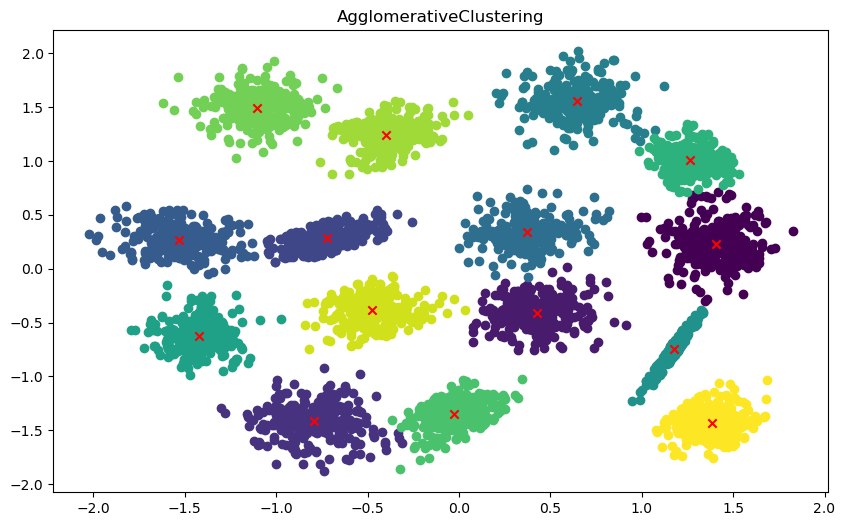

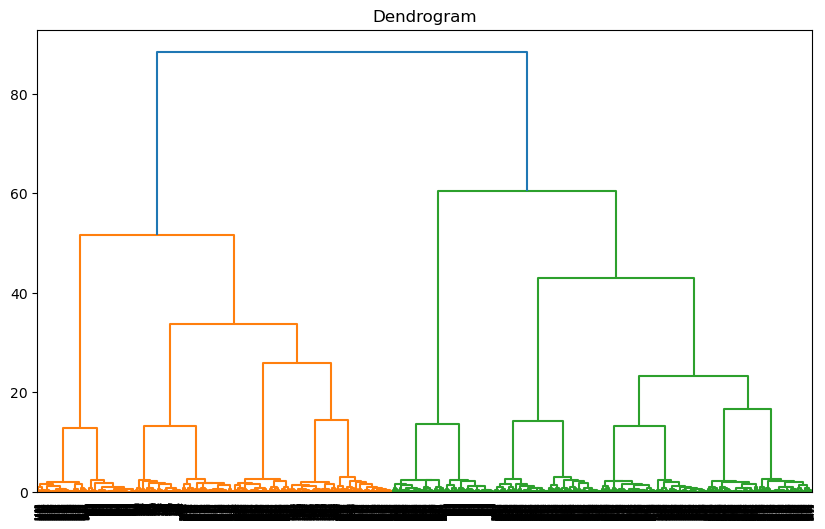

In [9]:
if not is_file_correct:
    print("Error: AF clustering can't be made")
else: 
    agglomerative_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS)
    cluster_labels = agglomerative_clustering.fit(data)
    cluster_labels = agglomerative_clustering.labels_
    cluster_centers = np.zeros((NUM_CLUSTERS, data.shape[1]))

    colors = plt.get_cmap('viridis', NUM_CLUSTERS)


    plt.figure(figsize=(10, 6))
    for label in range(NUM_CLUSTERS):
        cluster_data = data[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors(label)])
        cluster_center = np.mean(cluster_data, axis=0)
        cluster_centers[label] = cluster_center

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red')
    plt.title('AgglomerativeClustering')
    plt.show()

    linkage_matrix = linkage(data, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title('Dendrogram')
    plt.show()

## DBSCAN clustering

### Calculating optimal eps

<Figure size 500x500 with 0 Axes>

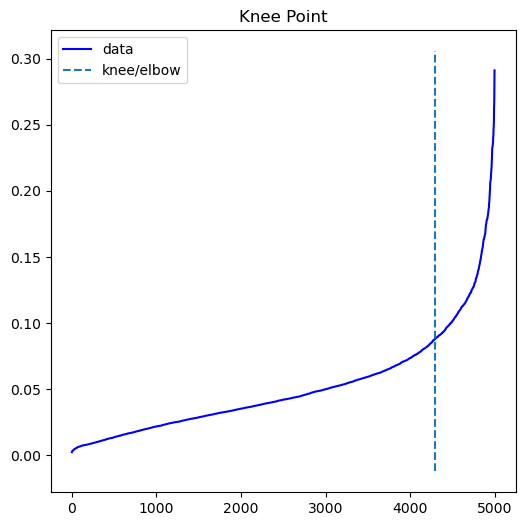

optimal eps = 0.08839464762542229


In [10]:
if not is_file_correct:
    print("Error: eps can't be calculated")
else:     
    nn = NearestNeighbors(n_neighbors=11)
    neighbors = nn.fit(data)
    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:,10], axis=0)


    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.show()
    print(f'optimal eps = {distances[knee.knee]}')

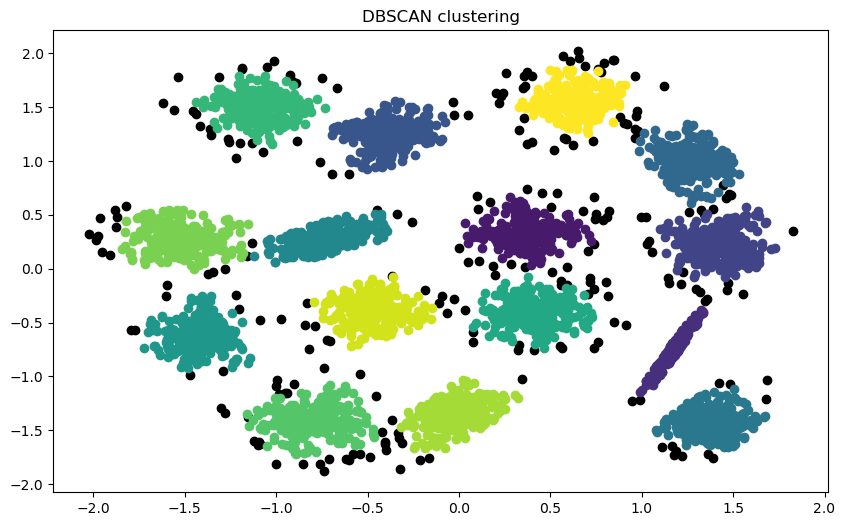

In [11]:
if not is_file_correct:
    print("Error: eps can't be calculated")
else: 
    dbscan = DBSCAN(eps=0.088, min_samples=9)
    dbscan.fit(data)
    labels = dbscan.labels_

    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, NUM_CLUSTERS + 1))


    plt.figure(figsize=(10, 6))
    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = 'black'
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color)
    plt.title('DBSCAN clustering')
    plt.show()